# K-means prestamos

## 1. Importar librerías

In [34]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
import statistics as stat

## 2. Cargar dataset

In [35]:
df_loans = pd.read_csv(
    "https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Databasets/k-means-prestamos"
    ".csv")

## 3. Visualizar los datos del dataset

In [36]:
df_loans.describe()
print("\nValores nulos totales:\n", df_loans.isnull().sum())
df_loans.head(20)


Valores nulos totales:
 Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
5,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
6,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
7,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
8,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
9,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y


## 4. Graficar los datos

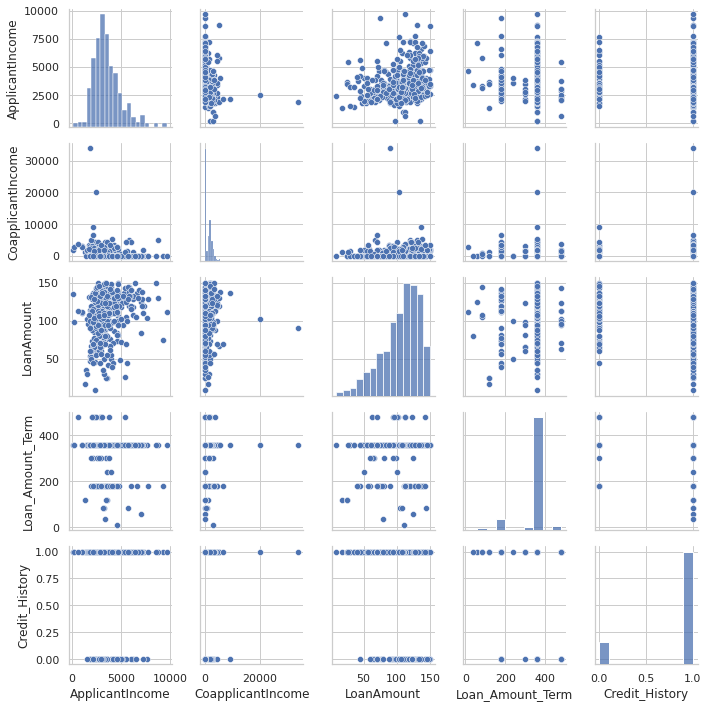

In [37]:
sb.set(style="whitegrid", context="notebook")
plot_data = df_loans.columns
sb.pairplot(df_loans[plot_data], height=2)
plt.tight_layout()
plt.show()

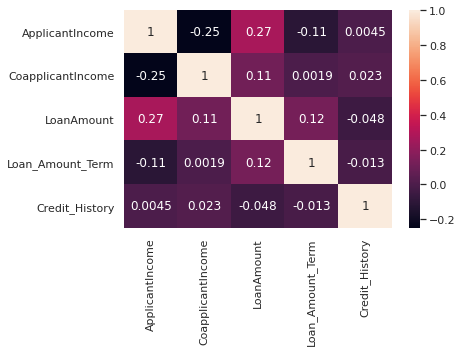

In [38]:
correlation_mat = df_loans.corr()
sb.heatmap(correlation_mat, annot=True)
plt.show()

## 5. Normalizar los datos

### 5.1 Reemplazando valores nulos por el valor que más se repite

In [39]:
def replace_nan_values(column):
    for i in range(len(df_loans[column])):
        if df_loans.isnull()[column][i]:
            df_loans.loc[i, column] = stat.mode(df_loans[column])

In [40]:
replace_nan_values('Gender')
replace_nan_values('Dependents')
replace_nan_values('Self_Employed')
replace_nan_values('Loan_Amount_Term')
replace_nan_values('Credit_History')

### 5.2 Reemplazando valores alfanuméricos por valores numéricos

In [41]:
le = preprocessing.LabelEncoder()
df_loans['Gender'] = le.fit_transform(df_loans['Gender'])
df_loans['Married'] = le.fit_transform(df_loans['Married'])
df_loans['Education'] = le.fit_transform(df_loans['Education'])
df_loans['Self_Employed'] = le.fit_transform(df_loans['Self_Employed'])
df_loans['Property_Area'] = le.fit_transform(df_loans['Property_Area'])
df_loans['Loan_Status'] = le.fit_transform(df_loans['Loan_Status'])

### 5.3 Visualizando el nuevo dataframe

In [42]:
print("\nNuevo dataset:\n", df_loans.head(20))
print("\nValores nulos totales:\n", df_loans.isnull().sum())


Nuevo dataset:
      Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0   LP001003       1        1          1          0              0   
1   LP001005       1        1          0          0              1   
2   LP001006       1        1          0          1              0   
3   LP001008       1        0          0          0              0   
4   LP001013       1        1          0          1              0   
5   LP001024       1        1          2          0              0   
6   LP001027       1        1          2          0              0   
7   LP001029       1        0          0          0              0   
8   LP001030       1        1          2          0              0   
9   LP001032       1        0          0          0              0   
10  LP001034       1        0          1          1              0   
11  LP001036       0        0          0          0              0   
12  LP001038       1        1          0          1              0   
13 

## 6. Separando los datos de entrenamiento

In [43]:
x_axis = np.array(df_loans[['ApplicantIncome', 'LoanAmount', 'Credit_History']])
y_axis = np.array(df_loans['Loan_Status'])

## 7. Buscando el total de clusters idóneo

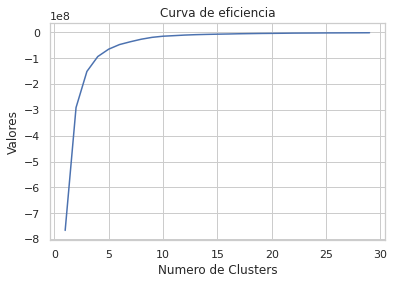

In [44]:
Nc = range(1, 30)
k_means = [KMeans(n_clusters=i) for i in Nc]
score = [k_means[i].fit(x_axis).score(x_axis) for i in range(len(k_means))]
plt.plot(Nc, score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

## 8. Instanciando el modelo k-means

In [45]:
k_means = KMeans(n_clusters=5).fit(x_axis)
labels = k_means.predict(x_axis)
centroids = k_means.cluster_centers_
print(centroids)

[[4.36504598e+03 1.10666667e+02 8.85057471e-01]
 [2.14706542e+03 9.63271028e+01 8.59813084e-01]
 [7.71213333e+03 1.19666667e+02 8.66666667e-01]
 [3.24032857e+03 1.03207143e+02 8.28571429e-01]
 [5.78431250e+03 1.19406250e+02 8.12500000e-01]]


## 9. Grupos de centroides

In [46]:
colores = ['blue', 'red', 'green', 'yellow', 'cyan']
asignar = []
for row in labels:
    asignar.append(colores[row])

## 10. mostramos grupos según gender y education

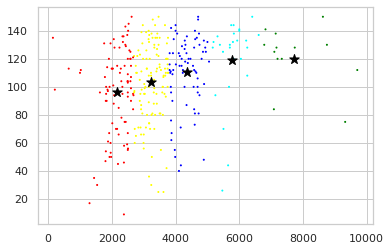

In [47]:
f1 = df_loans['ApplicantIncome'].values
f2 = df_loans['LoanAmount'].values
f3 = df_loans['Credit_History'].values

plt.scatter(f1, f2, f3, c=asignar)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=100)
plt.show()

## 11. Gráfico en 3D

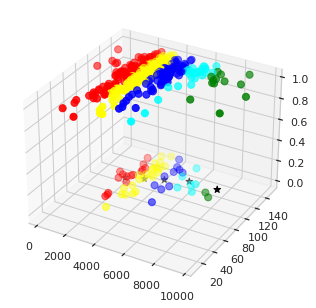

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_axis[:, 0], x_axis[:, 1], x_axis[:, 2], c=asignar, s=50)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="*", c="black", s=50)
plt.show()

## 12. Clústers en el DataFrame

In [52]:
df_cluster = pd.DataFrame()
df_cluster['Education'] = df_loans.Education
df_cluster['ApplicantIncome'] = df_loans.ApplicantIncome
df_cluster['LoanAmount'] = df_loans.Loan_Amount_Term
df_cluster['Loan_Status'] = df_loans.Loan_Status
df_cluster['cluster'] = k_means.labels_
df_cluster.head()

,Education,ApplicantIncome,LoanAmount,Loan_Status,cluster
0,0,4583,360.0,0,0
1,0,3000,360.0,1,3
2,1,2583,360.0,1,1
3,0,6000,360.0,1,4
4,1,2333,360.0,1,1


## 13. Clústers del modelo

In [55]:
new_df = pd.DataFrame()
new_df['ApplicantIncome'] = df_loans['ApplicantIncome'].values
new_df['Loan_Status'] = df_loans['Loan_Status'].values
new_df['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color'] = colores
cantidadGrupo['cantidad'] = new_df.groupby('label').size()
print(cantidadGrupo)

    color  cantidad
0    blue        87
1     red       107
2   green        15
3  yellow       140
4    cyan        32


## 14. Visualizar clústers indivuduales

In [56]:
df_cluster[df_cluster.cluster == 3]

,Education,ApplicantIncome,LoanAmount,Loan_Status,cluster
1,0,3000,360.0,1,3
5,0,3200,360.0,1,3
10,1,3596,240.0,1,3
11,0,3510,360.0,0,3
16,1,3365,360.0,0,3
...,...,...,...,...,...
371,0,2726,360.0,0,3
372,0,3000,180.0,1,3
375,0,2987,360.0,0,3
377,0,3232,360.0,1,3
